In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('/home/pratiyushp/Downloads/datasets/data.csv')
print(dataset)

   Country   Age   Salary  Purchased
0   France  44.0  72000.0          0
1    Spain  27.0  48000.0          1
2  Germany  30.0  54000.0          0
3    Spain  38.0  61000.0          0
4  Germany  40.0      NaN          1
5   France  35.0  58000.0          1
6    Spain   NaN  52000.0          0
7   France  48.0  79000.0          1
8  Germany  50.0  83000.0          0
9   France  37.0  67000.0          1


In [41]:
x = dataset.iloc[:,:-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [42]:
y = dataset.iloc[:,3].values
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [43]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# imputer = imputer.fit(x[:,1:3])
# x[:,1:3] = imputer.transform(x[:,1:3])
# x
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value = 2000)
imputer = imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 2000],
       ['France', 35.0, 58000.0],
       ['Spain', 2000, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

**Encoding the Country Variable**

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x = LabelEncoder()
x[:, 0] = label_encoder_x.fit_transform(x[:, 0])
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 2000],
       [0, 35.0, 58000.0],
       [2, 2000, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

**Dummy Encoding**

In [45]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_train

array([[ 0.13483997, -0.37552711, -2.38838247],
       [-0.94387981, -0.38015136,  0.54769054],
       [ 1.21355975, -0.3955655 , -0.31054618],
       [ 1.21355975,  2.64564534, -0.12986477],
       [-0.94387981, -0.3631958 ,  1.08973479],
       [ 1.21355975, -0.37860994,  0.27666842],
       [-0.94387981, -0.36936145,  0.77354231],
       [-0.94387981, -0.38323418,  0.14115736]])

In [49]:
x_test - st_x.transform(x_test)

array([[0.8651600275073515, 30.390941256877753, 54000.03952405983],
       [0.8651600275073515, 50.360112966537464, 82998.72958379115]],
      dtype=object)

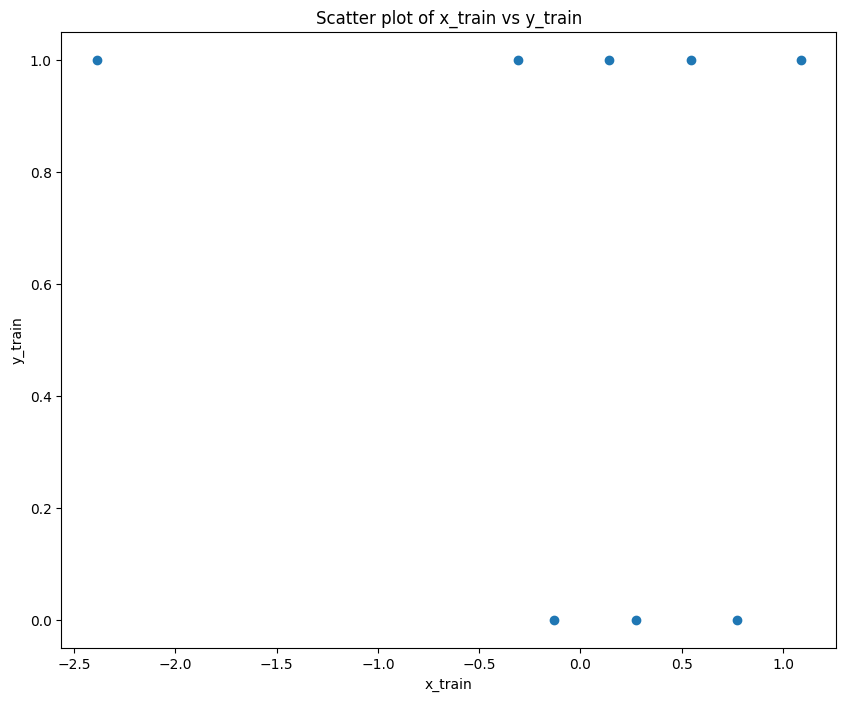

In [65]:
plt.figure(figsize = (10, 8))
plt.scatter(x_train[:,-1], y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Scatter plot of x_train vs y_train')
plt.show()